In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
path = "~/Desktop/gym/"
logs = ["e2enavreppretrainenv_2021_05_18__15_14_54_PPO_E2E_VCARCH_C64.csv",
        "e2enavreppretrainenv_2021_05_18__16_33_04_PPO_E2E_VCARCH_C64.csv",
        "e2enavreppretrainenv_2021_05_18__20_32_28_PPO_E2E_VCARCH_C64.csv",
        "e2enavreppretrainenv_2021_05_19__10_06_07_PPO_E2E_VCARCH_C64.csv",
        "e2enavreppretrainenv_2021_05_19__10_41_12_PPO_E2E_VCARCH_C64.csv",
        "e2enavreppretrainenv_2021_06_02__11_07_31_PPO_E2E_VCARCH_C64.csv",
        "e2enavreppretrainenv_2021_06_02__11_31_04_PPO_E2E_VCARCH_C64.csv",
        "e2enavreppretrainenv_2021_06_02__12_04_01_PPO_E2E_VCARCH_C64.csv",
        "e2enavreppretrainenv_2021_06_02__14_57_53_PPO_E2E_VCARCH_C64.csv",
        "e2enavreppretrainenv_2021_06_02__22_58_44_PPO_E2E_VCARCH_C64.csv",
        "e2enavreptrainenv_2021_05_05__11_14_04_PPO_E2E_VCARCH_C64.csv"]
log_paths = [path+log for log in logs]

log_paths = [log_paths[-4], log_paths[-2]]

num_envs = 6
val_freq = 10000
test_freq = 10

data = []

for log_path in log_paths:
    data.append(pd.read_csv(log_path))

In [40]:
data[0][data[0]["scenario"]=="navreptraintrain"][-20:]

,Unnamed: 0,total_steps,scenario,damage,steps,goal_reached,reward,num_agents,num_walls,wall_time
1005,1005,143473,navreptraintrain,0,176.0,False,0.0,5,10,1.622635e+09
1006,1006,143649,navreptraintrain,0,176.0,False,0.0,5,10,1.622635e+09
1007,1007,143825,navreptraintrain,0,176.0,False,0.0,5,10,1.622635e+09
1008,1008,144001,navreptraintrain,0,176.0,False,0.0,5,10,1.622635e+09
1009,1009,144177,navreptraintrain,0,176.0,False,0.0,5,10,1.622635e+09
1010,1010,144264,navreptraintrain,0,87.0,True,100.0,5,10,1.622635e+09
1011,1011,144440,navreptraintrain,0,176.0,False,0.0,5,10,1.622635e+09
1012,1012,144616,navreptraintrain,0,176.0,False,0.0,5,10,1.622635e+09
1013,1013,144792,navreptraintrain,0,176.0,False,0.0,5,10,1.622635e+09
1014,1014,144911,navreptraintrain,0,119.0,True,100.0,5,10,1.622635e+09


0.0
0.0


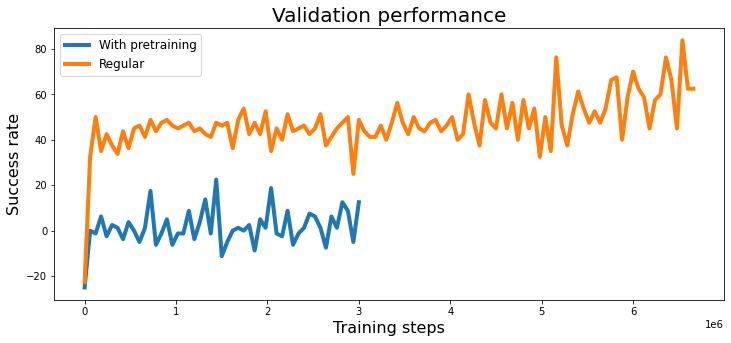

In [41]:
fig_val = plt.figure(figsize = [12,5])
#fig_test, ax_test = plt.figure()

for idx, d in enumerate(data):
    #print(len(d[d["scenario"]=="navreptraintrain"])/20)
    y_val = [np.mean(d[d["scenario"]=="navreptraintrain"]["reward"][i*20:i*20+20]) 
          for i in range(int(len(d[d["scenario"]=="navreptraintrain"])/20))]

    x_val = np.arange(len(y_val))*num_envs*val_freq
    
    success_rate_test = d[d["scenario"]=="navrepval"]["goal_reached"].to_numpy(dtype=float)
    x_test = np.arange(len(success_rate_test))*num_envs*val_freq*test_freq
    
    print(success_rate_test[0])
    #plt.plot(x_test,success_rate_test, linewidth=4)
    plt.title("Validation performance", fontsize=20)
    plt.xlabel("Training steps", fontsize=16)
    plt.ylabel("Success rate", fontsize=16)
    plt.plot(x_val,y_val, label=idx, linewidth=4)
plt.legend(["With pretraining", "Regular"],fontsize=12)
plt.show()

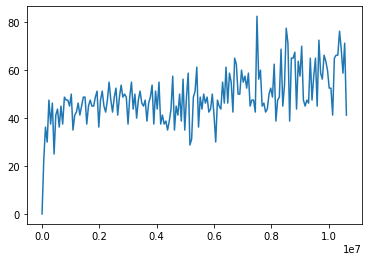

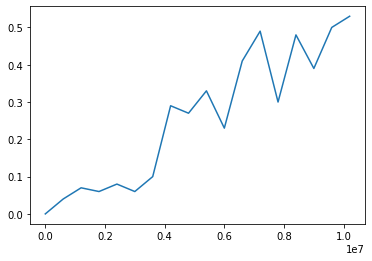

In [19]:
plt.figure()
plt.plot(x_val,y_val)
plt.show()

plt.figure()
plt.plot(x_test,success_rate_test)
plt.show()

In [65]:
len(data[data["scenario"]=="navreptraintrain"]["reward"])

3240

In [62]:
success_rate_test

array(['0.0', '0.04', '0.07', '0.11', '0.11', '0.2', '0.39', '0.29',
       '0.37', '0.22', '0.37', '0.45', '0.52', '0.52', '0.48', '0.48',
       '0.51'], dtype=object)

In [ ]:
range()